In [49]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic3.csv')

In [50]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

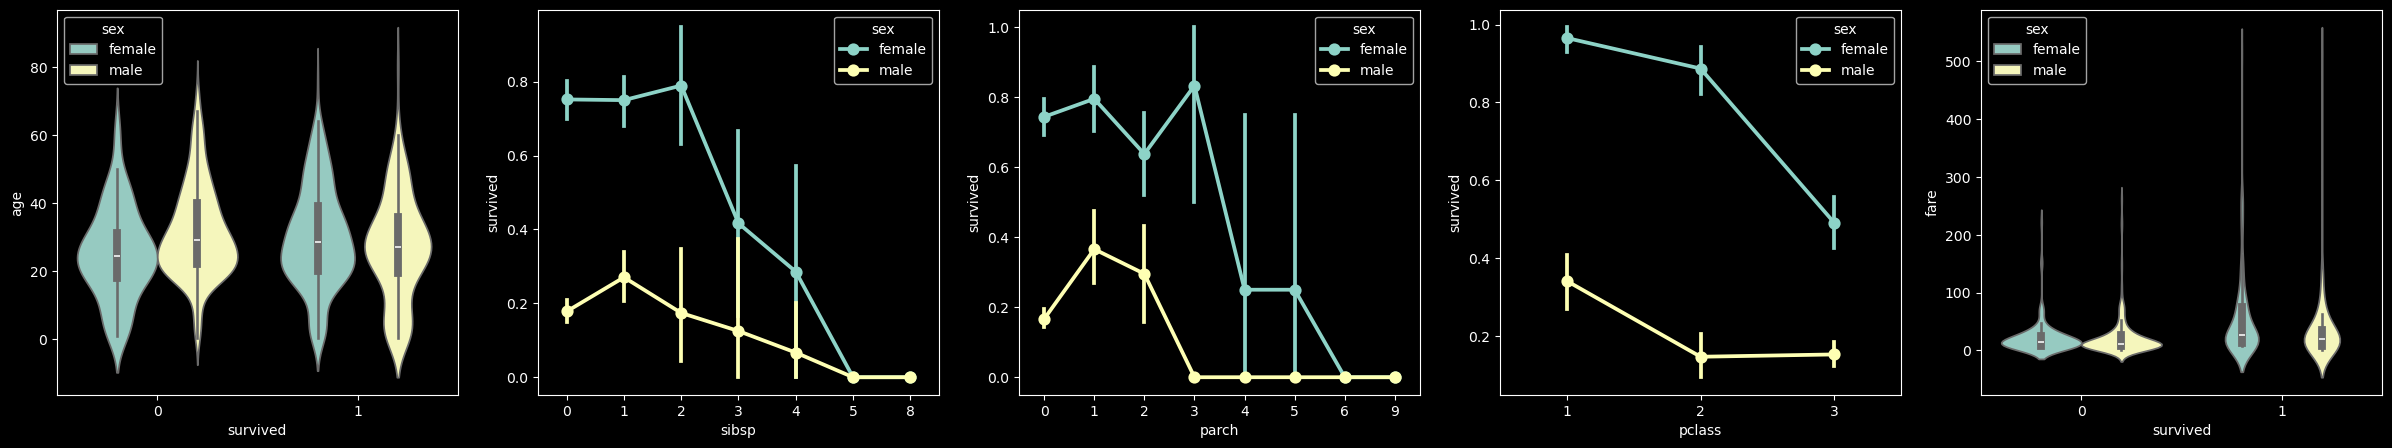

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])
plt.show()

In [52]:
data.replace({'male': 1, 'female': 0}, inplace=True)
data.corr(numeric_only=True).abs()[["survived"]]

C:\Users\Marcel\AppData\Local\Temp\ipykernel_10856\1510639245.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'male': 1, 'female': 0}, inplace=True)


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


In [53]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [54]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [57]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [58]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


In [59]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import datetime

model = Sequential()

In [60]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [61]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 5)                 30        
                                                                 
 dense_10 (Dense)            (None, 5)                 30        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


model.fit(X_train, y_train, batch_size=32, epochs=50, callbacks=[tensorboard_callback])

Epoch 1/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5873
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.5909
Epoch 5/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.6950
Epoch 6/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.7548
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6102 - accuracy: 0.7667
Epoch 8/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.7727
Epoch 9/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5539 - accuracy: 0.7751
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.7811
Epoch 11/50
27/27 [

In [63]:
y_pred = np.rint(model.predict(X_test).flatten())
print(metrics.accuracy_score(y_test, y_pred))

7/7 [==============================] - 0s 888us/step
0.7942583732057417


In [64]:
data.head()

,sex,pclass,age,relatives,fare,survived
0,0,1,29.00,0,211.3375,1
1,1,1,0.92,1,151.5500,1
2,0,1,2.00,1,151.5500,0
3,1,1,30.00,1,151.5500,0
4,0,1,25.00,1,151.5500,0
